<a href="https://colab.research.google.com/github/jusimon/AlternusVera/blob/master/AlternusVera_Political_Affiliation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **Drifters**
    
Name: **Julian S. Simon (013793273)** 

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process of My Approach 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
    - Lemmatization
    - Stemming
    - Spell Check
    - Dictionary check
- **Feature 1 :** Political affiliation
    - LDA Topic Modelling
    - Doc2Vec 
    - TF-IDF
    - LDA using TF-IDF
    - Sentiment analysis 
- Rating 
- Vectorization
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection
- **Polical Affiliation**
- **Bias**
- **Sensational Analysis**
- **Credibility**


### Team Contributions example:

|Features  |  Member |
|-----|-----|
| Political Affiliation                  |  Julian S. Simon |  
| Bias                                   |  ViswanathSingh Kambam | 
| Sensational Analysis                   |  Paramdeep Saini |   
| Credibility                            |  Rajalakshmi Babu |

 
#### Enrichment Dataset Details

  - Sensational Words Dictionary
  - PoliticalFact Fake news and Real News Content
  - Spam Dictionary
  - Kaggle Data (https://www.kaggle.com/kapastor/democratvsrepublicantweets)

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 

#### Political Affiliation
Political affiliation is nothing but having official connection to a news by a party. Political affliation towards certain political parties, political leaders can influence fake news origin. An unbiased view on media reports requires an understanding of the political bias of media content. 

#### What did I try and What worked? 

To begin with we had to understand the dataset. So, I have divided the dataset into test and train. The dataset had number of columns and every column was interrelated with each other. So, I decided to visualize the dataset to understand it better. From the political affiliation column, the party with the highest number of news is arranged in the decending order to findout the party which has more news. The labels are plotted against the highest number of party so that it is easy to findout how each each parities can influence the fake new detection. TF-IDF, Word2Vec and Doc2Vec approach using the dictionary of words and its polarity for vectorization. Sentimental analysis is applied on the bag of words to find the positive negative and neutral analysis. This scores are mapped to the get the fake news detection. 

#### What did not work?

Using political affiliation alone as a feature did not yield a great result. As explained about analysing with sentimental analysis gives the better result. The accuracy found by this model seems be at around 44% in average run of different algorithms such as Linear Regression, Random Forest and Naive Bayes. 


#### What Alternate you tried ?
  Created the second note book with better data preprocessing and amalgamated Kaggle data as mentioned in the above link to get the party affiliation and their corresponding tweets analysis. Tweets are converted to bag of words and used word2vec to use them in the model creation and train data has been added with additonal vectors. With this improvement the accuracy is reported around 56%.

#### Improved Results

| Algorithm      | Accuracy            |  precision |  recall | f1-score  | support   |
|----------------|---------------------|------------|---------|-----------|-----------|
| MultiNB        | 0.56298828          |      0.55  |    0.56 |     0.43  |   10240   |
| DescionTree    | 0.56298828          |      0.54  |    0.50 |     0.39  |   10240   |
| Random Forest  | 0.56298828          |      0.54  |    0.50 |     0.39  |   10240   |
| LogR_clf       | 0.56298828          |      0.54  |    0.50 |     0.39  |   10240   |
| svm_Linear     | 0.56298828          |      0.53  |    0.50 |     0.38  |   10240   |
| SVM_SGD        | 0.56259766          |      0.54  |    0.56 |     0.43  |   10240   |
| xgb_clf        | 0.56269531          |      0.54  |    0.56 |     0.43  |   10240   |
|                |                     |            |         |           |           |

In [0]:
## ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Data selection and observations

In [0]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [159]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)
drive.mount('/content/gdrive')

pd.set_option('display.max_columns', 500)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [160]:
train_link = "https://drive.google.com/open?id=1uYRl81ky2XUIrENCpmZr3IB_48cEuiWp"
fluff, id1 = train_link.split('=')
test_link = "https://drive.google.com/open?id=1_xQWkwm-ZD0NR824TH_eTyIYzW79uvyZ"
fluff, id2 = test_link.split('=')
valid_link = "https://drive.google.com/open?id=1gaS9R-PQvER5DE1dAgh7z6v4u_euIvrO"
fluff, id3 = valid_link.split('=')
valid_link = "https://drive.google.com/open?id=1qvdtBzhmA65E4-veWwx0_bkxaMem50V0"
fluff, id4 = valid_link.split('=')
train_bodies = "https://drive.google.com/open?id=1fo74P-p-zwqDNypVxefc0hch0UX-qdGg"
fluff, id5 = train_bodies.split('=')
ucinews = "https://drive.google.com/open?id=1tz6i1Y45GyubVYzzkBWDRnDZDkG6u8i1"
fluff, id6 = ucinews.split('=')
print (id1) # Verify that you have everything after '='

1uYRl81ky2XUIrENCpmZr3IB_48cEuiWp


### Load the dataset

In [0]:
test_filename = 'test.tsv'
train_filename = 'train.tsv'
valid_filename = 'valid.tsv'

train_party = 'partyTweets.csv'
uci_news = 'uci-news-aggregator.csv'

In [0]:
downloaded = googleDrive.CreateFile({'id':id1}) 
downloaded.GetContentFile(train_filename)  
downloaded = googleDrive.CreateFile({'id':id2}) 
downloaded.GetContentFile(test_filename)  
downloaded = googleDrive.CreateFile({'id':id3}) 
downloaded.GetContentFile(valid_filename)

downloaded = googleDrive.CreateFile({'id':id4}) 
downloaded.GetContentFile(train_party)  
downloaded = googleDrive.CreateFile({'id':id6}) 
downloaded.GetContentFile(uci_news)


### Define Column names in Dataset

In [0]:
Colnames = ['Json_Id', 'Label', 'Statement', 'Subject', 'SpeakerName',
           'JobTitle', 'StateInfo', 'partyAffiliation',
           'BarelyTrueCounts', 'FalseCounts','HalfTrueCounts',
           'MostlyTrueCounts','PantsOnFireCounts','Context']
#labelcolname = 'Label'
titlecolname = 'partyAffiliation'

In [0]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
##Printing the rod cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud


def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12.0,8.0), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    mp.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        mp.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        mp.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'top'})
    else:
        mp.imshow(wordcloud);
        mp.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    mp.axis('off');
    mp.tight_layout()  

In [0]:
def create_word_cloud(dataframe, colname, title):
    plot_wordcloud(dataframe[colname].dropna(),  max_words=300000, max_font_size=300, title=title)

### Reading the Dataset

In [166]:
train_news = pd.read_csv(train_filename, sep='\t', names = Colnames,error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = Colnames,error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = Colnames,error_bad_lines=False)

train_news.head()

,Json_Id,Label,Statement,Subject,SpeakerName,JobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


### Simplifying the label contents

In [167]:
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def simplify_label(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0
labelcolname = 'Encoded_Label'

train_news[labelcolname] = train_news.apply(lambda row: simplify_label(row['Label']), axis=1)
test_news[labelcolname] = test_news.apply(lambda row: simplify_label(row['Label']), axis=1)
valid_news[labelcolname] = valid_news.apply(lambda row: simplify_label(row['Label']), axis=1)
train_news.head()

,Json_Id,Label,Statement,Subject,SpeakerName,JobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1


## Data Preprocessing
We will perform the following steps:

* All stopwords are removed.
* Words that have fewer than 3 characters are removed.
* Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are stemmed — words are reduced to their root form.
* Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.

In [168]:
import string
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove Stopwords and shortwords using nltk stopwords

In [0]:
sw = stopwords.words('english')
#Remove stop words
def remove_stop_and_short_words(text):
    text = [word.lower() for word in text.split() if (word.lower() not in sw) and (len(word)>3)]
    return " ".join(text)

def remove_stop_and_short_words_new(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return " ".join(result)

### Perform lemmatization and Stemming process using WordNetLemmatizer

In [0]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#Removes punctuations from text data
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

### Preprocess text function

In [0]:
def process_data(text):
    text = remove_stop_and_short_words_new(text)
    text = lemmatize_stemming(text)
    text = remove_punctuation(text)
    return text

def preprocess(text):
    #result =[]
    #result.append(process_data(text).split())
    return process_data(text).split()

### Just testing the preprocess 

In [172]:
print (process_data(train_news['Statement'][0]))
#process_data(train_news['Statement'][4])
preprocess(train_news['Statement'][4])

say anni list polit group support trimest abort demand


['econom', 'turnaround', 'start', 'term']

In [173]:
processedheadlinecolname = 'processed_Statement'

train_news['index'] = train_news.index
train_news[processedheadlinecolname] = train_news.apply(lambda row: process_data(row['Statement']), axis=1)
train_news.head()

test_news['index'] = test_news.index
test_news[processedheadlinecolname] = test_news.apply(lambda row: process_data(row['Statement']), axis=1)
test_news.head()

valid_news['index'] = valid_news.index
valid_news[processedheadlinecolname] = valid_news.apply(lambda row: process_data(row['Statement']), axis=1)
valid_news.head()

,Json_Id,Label,Statement,Subject,SpeakerName,JobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,0,american work
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,1,obama swear offic holi bibl instead kuran equi...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,2,say have organ parad social welfar organ invol...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,3,say near half oregon children poor
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,4,attack republican program econom stimulus plan...


### Displaying the Party Affiliation Title data in different format using WordCloud
This gives us the better display of the contents of column 

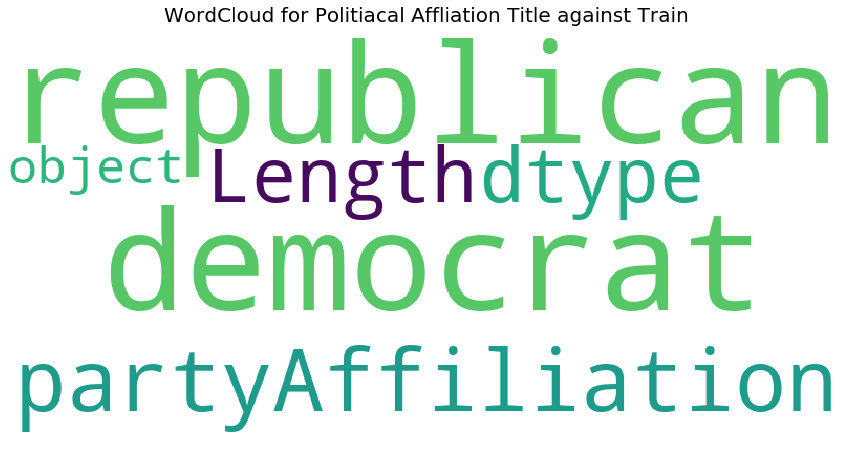

In [174]:
create_word_cloud(train_news,titlecolname,'WordCloud for Politiacal Affliation Title against Train')

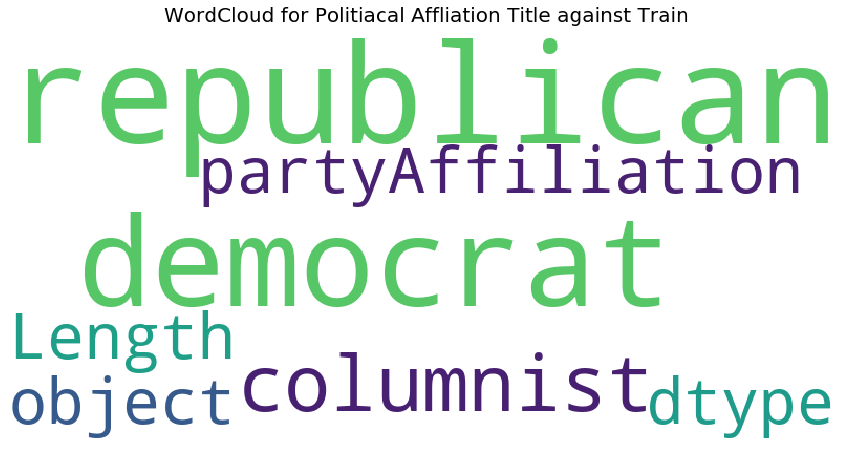

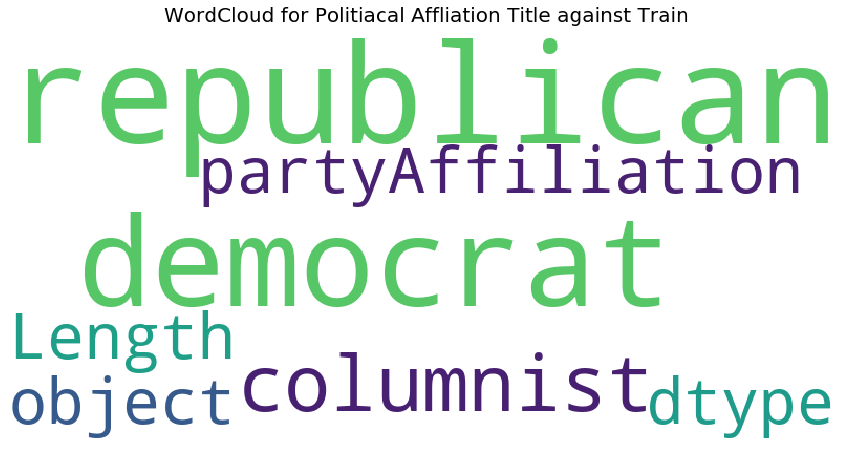

In [175]:
create_word_cloud(test_news,titlecolname,'WordCloud for Politiacal Affliation Title against Train')

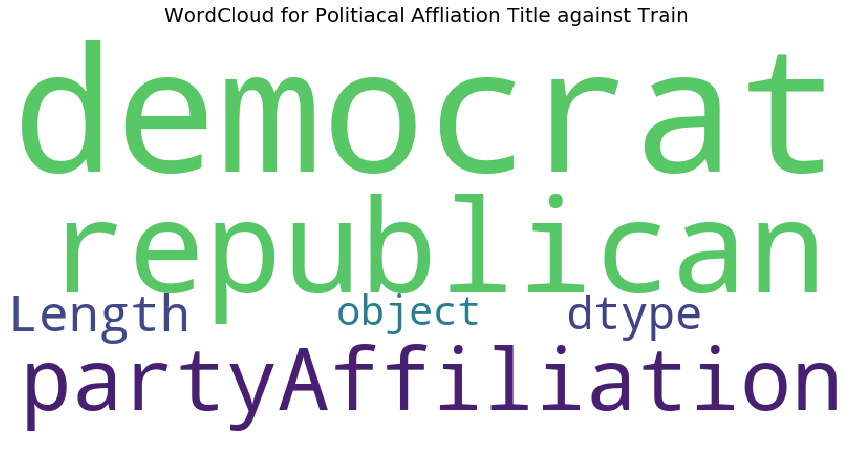

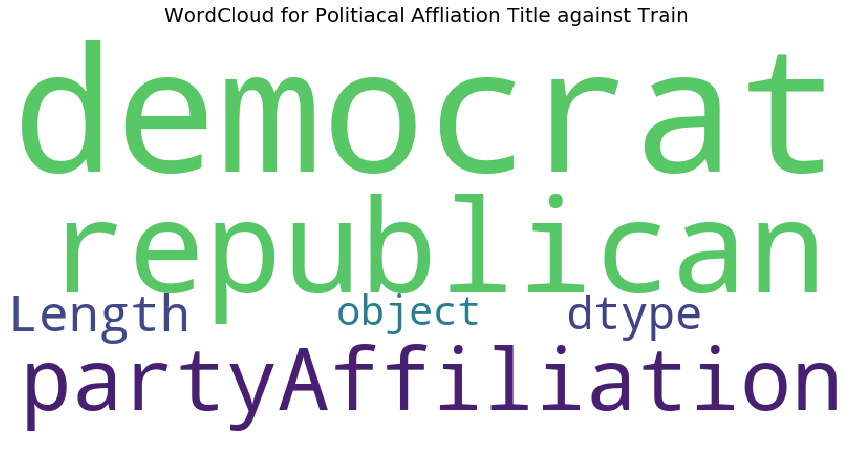

In [176]:
create_word_cloud(valid_news,titlecolname,'WordCloud for Politiacal Affliation Title against Train')

### Column choosed for Political Affiliationd Factor

Choose Party Affiliation title as a parameter to find information that how much Party Affiliation can affect the label values.For example if the Party is republican, then the graph between speakers Party Affiliation vs label verifies whether speaker is saying the truth or not

In [0]:
X_train=train_news[titlecolname]
Y_train=train_news[labelcolname]

#### Exploring data through cross tabulation

In [0]:
CrossTab = pd.crosstab(X_train,Y_train,margins=True)

In [179]:
CrossTab.sort_values('All', ascending=False)

Encoded_Label,0,1,All
partyAffiliation,,,
All,4486,5752,10238
republican,2240,2257,4497
democrat,1127,2209,3336
none,856,888,1744
organization,112,107,219
independent,40,107,147
newsmaker,19,37,56
libertarian,13,27,40
activist,14,25,39


Encoded_Label,0,1,All
partyAffiliation,,,
All,4486,5752,10238
republican,2240,2257,4497
democrat,1127,2209,3336
none,856,888,1744
organization,112,107,219
independent,40,107,147
newsmaker,19,37,56
libertarian,13,27,40
activist,14,25,39


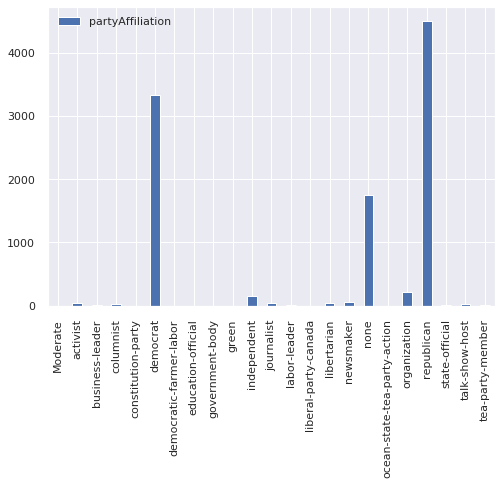

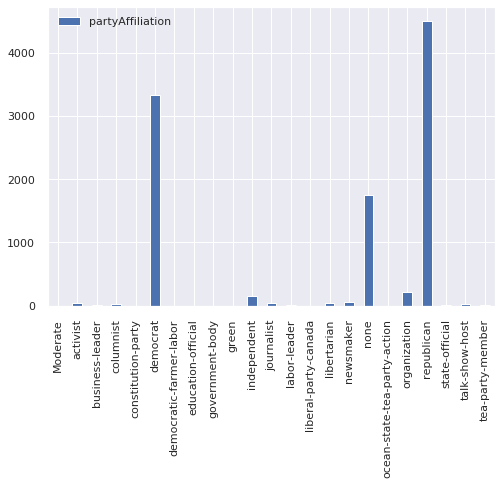

In [180]:
fig, ax = plt.subplots()
ax1 = X_train.value_counts().sort_index(ascending=True).head(10264).plot('bar', ax=ax, legend=True)

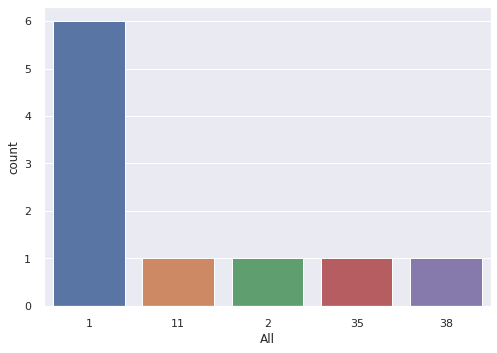

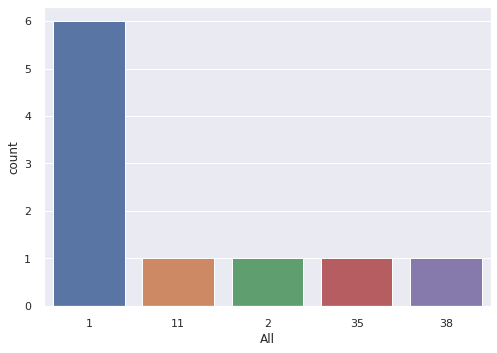

In [181]:
import seaborn as sns
sns.countplot(x="All", data=CrossTab,order=CrossTab["All"].value_counts().iloc[:5].index)
plt.show()

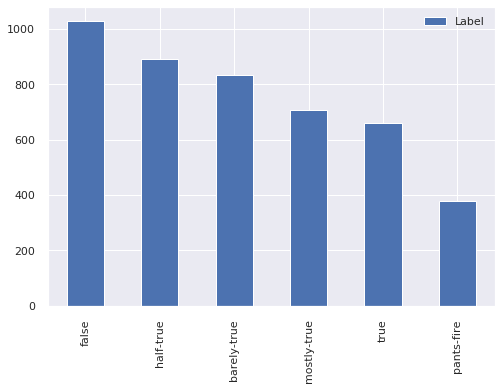

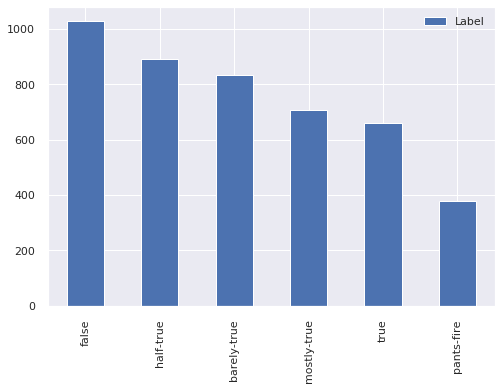

In [182]:
#By changing the value here for column we can check as per Party Affiliation whats the probability of speaker lying
import numpy as np
values_for_true = np.column_stack([train_news[Colnames].str.contains("republican") for Colnames in [titlecolname]])
#print (values_for_true)
unique, counts = np.unique(values_for_true, return_counts=True)
dict(zip(unique, counts))
train_news['values_for_true'] = values_for_true
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax1 = train_news[train_news['values_for_true']==True]['Label'].value_counts().plot('bar', ax=ax, legend=True)

In [183]:
#Setting NAN to No Party under No party
X_train = X_train.replace(np.nan,'No Party', regex=True)
X_train

0        republican
1          democrat
2          democrat
3              none
4          democrat
            ...    
10235          none
10236    republican
10237    republican
10238      democrat
10239    republican
Name: partyAffiliation, Length: 10240, dtype: object

0        republican
1          democrat
2          democrat
3              none
4          democrat
            ...    
10235          none
10236    republican
10237    republican
10238      democrat
10239    republican
Name: partyAffiliation, Length: 10240, dtype: object

### Select a document to preview after prepocessing

In [184]:
#checking the sample document 
doc_sample = train_news[train_news['Json_Id'] == '2635.json']["Statement"][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))
#print(process_data(doc_sample))

original document: 
['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.']


 tokenized and lemmatized document: 
['say', 'anni', 'list', 'polit', 'group', 'support', 'trimest', 'abort', 'demand']
original document: 
['Says', 'the', 'Annies', 'List', 'political', 'group', 'supports', 'third-trimester', 'abortions', 'on', 'demand.']


 tokenized and lemmatized document: 
['say', 'anni', 'list', 'polit', 'group', 'support', 'trimest', 'abort', 'demand']


### Preprocess the headline text, saving the results as ‘processed_docs'

In [185]:
processed_docs = train_news['Statement'].map(preprocess)
processed_docs[:10]

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: Statement, dtype: object

0    [say, anni, list, polit, group, support, trime...
1    [declin, coal, start, start, natur, take, star...
2    [hillari, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legisl, like, mandat, f...
4                    [econom, turnaround, start, term]
5    [chicago, bear, start, quarterback, year, tota...
6               [dunnam, live, district, repres, year]
7    [person, stage, work, activ, year, pass, russ,...
8    [take, million, oregon, lotteri, fund, port, n...
9    [say, primari, oppon, glenn, grothman, leibham...
Name: Statement, dtype: object

### Bag of Words on the Data set
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set

In [186]:
#processed docs->getting words
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 trimest
9 administr
10 begin


In [187]:
#printing actual dictionary
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
print(dictionary)

Dictionary(1078 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)
Dictionary(1078 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)


In [188]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[10][0]

(24, 2)

(24, 2)

In [189]:
#checking word frequency count
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))
print(len(bow_corpus))

Word 7 ("administr") appears 1 time.
Word 84 ("economi") appears 1 time.
Word 128 ("scott") appears 1 time.
Word 129 ("walker") appears 1 time.
Word 184 ("member") appears 2 time.
Word 254 ("job") appears 1 time.
Word 279 ("public") appears 1 time.
Word 326 ("hear") appears 1 time.
Word 547 ("charg") appears 1 time.
Word 799 ("talk") appears 1 time.
Word 1031 ("field") appears 1 time.
10240
Word 7 ("administr") appears 1 time.
Word 84 ("economi") appears 1 time.
Word 128 ("scott") appears 1 time.
Word 129 ("walker") appears 1 time.
Word 184 ("member") appears 2 time.
Word 254 ("job") appears 1 time.
Word 279 ("public") appears 1 time.
Word 326 ("hear") appears 1 time.
Word 547 ("charg") appears 1 time.
Word 799 ("talk") appears 1 time.
Word 1031 ("field") appears 1 time.
10240


In [0]:
#applying tf-idf and LDA
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [191]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3397402827336795),
 (1, 0.5002880765433487),
 (2, 0.4088224168287155),
 (3, 0.4639566513984633),
 (4, 0.40750764496407926),
 (5, 0.10879086838115597),
 (6, 0.27202739591951525)]
[(0, 0.3397402827336795),
 (1, 0.5002880765433487),
 (2, 0.4088224168287155),
 (3, 0.4639566513984633),
 (4, 0.40750764496407926),
 (5, 0.10879086838115597),
 (6, 0.27202739591951525)]


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’. 
For each topic, we will explore the words occuring in that topic and its relative weight.

In [192]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"say" + 0.018*"obama" + 0.018*"million" + 0.016*"american" + 0.013*"state" + 0.011*"year" + 0.011*"job" + 0.011*"presid" + 0.010*"vote" + 0.009*"campaign"
Topic: 1 
Words: 0.037*"state" + 0.029*"year" + 0.022*"say" + 0.013*"texa" + 0.011*"peopl" + 0.010*"immigr" + 0.010*"school" + 0.009*"unit" + 0.008*"georgia" + 0.007*"averag"
Topic: 2 
Words: 0.025*"say" + 0.015*"health" + 0.014*"care" + 0.013*"trump" + 0.013*"dont" + 0.012*"support" + 0.012*"american" + 0.011*"state" + 0.010*"donald" + 0.009*"texa"
Topic: 3 
Words: 0.021*"obama" + 0.018*"say" + 0.012*"vote" + 0.012*"state" + 0.011*"time" + 0.011*"forc" + 0.010*"florida" + 0.010*"presid" + 0.010*"percent" + 0.009*"servic"
Topic: 4 
Words: 0.044*"say" + 0.019*"year" + 0.016*"state" + 0.016*"fund" + 0.015*"care" + 0.013*"school" + 0.012*"budget" + 0.011*"health" + 0.011*"offic" + 0.011*"million"
Topic: 5 
Words: 0.076*"say" + 0.027*"year" + 0.023*"presid" + 0.022*"obama" + 0.016*"billion" + 0.013*"barack" + 0.012

In [193]:
#LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.014*"say" + 0.011*"year" + 0.008*"go" + 0.008*"dollar" + 0.008*"obama" + 0.008*"state" + 0.007*"spend" + 0.007*"senat" + 0.007*"job" + 0.007*"dont"
Topic: 1 Word: 0.014*"say" + 0.009*"job" + 0.008*"percent" + 0.008*"democrat" + 0.008*"american" + 0.008*"vote" + 0.008*"month" + 0.007*"health" + 0.007*"creat" + 0.007*"island"
Topic: 2 Word: 0.019*"tax" + 0.017*"billion" + 0.016*"rais" + 0.013*"say" + 0.012*"job" + 0.011*"million" + 0.010*"percent" + 0.010*"obama" + 0.010*"year" + 0.010*"state"
Topic: 3 Word: 0.013*"health" + 0.013*"say" + 0.011*"care" + 0.010*"state" + 0.010*"support" + 0.010*"texa" + 0.010*"year" + 0.008*"rick" + 0.007*"georgia" + 0.007*"fund"
Topic: 4 Word: 0.017*"say" + 0.013*"year" + 0.012*"spend" + 0.009*"school" + 0.008*"percent" + 0.008*"texa" + 0.007*"trump" + 0.007*"state" + 0.007*"abort" + 0.006*"student"
Topic: 5 Word: 0.016*"state" + 0.010*"unit" + 0.010*"say" + 0.010*"year" + 0.010*"budget" + 0.010*"countri" + 0.008*"govern" + 0.008*"economi

In [194]:
processed_docs[4310]

['member',
 'public',
 'charg',
 'hear',
 'scott',
 'walker',
 'dozen',
 'member',
 'administr',
 'talk',
 'job',
 'economi',
 'lambeau',
 'field']

['member',
 'public',
 'charg',
 'hear',
 'scott',
 'walker',
 'dozen',
 'member',
 'administr',
 'talk',
 'job',
 'economi',
 'lambeau',
 'field']

#### Performance evaluation by classifying sample document using LDA Bag of Words model
We will check where our test document would be classified.

In [195]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.6100305914878845	 
Topic: 0.069*"say" + 0.028*"percent" + 0.018*"vote" + 0.018*"tax" + 0.017*"state" + 0.016*"clinton" + 0.013*"rais" + 0.013*"hillari" + 0.011*"go" + 0.011*"republican"

Score: 0.2899485230445862	 
Topic: 0.025*"say" + 0.015*"health" + 0.014*"care" + 0.013*"trump" + 0.013*"dont" + 0.012*"support" + 0.012*"american" + 0.011*"state" + 0.010*"donald" + 0.009*"texa"

Score: 0.012503624893724918	 
Topic: 0.076*"say" + 0.027*"year" + 0.023*"presid" + 0.022*"obama" + 0.016*"billion" + 0.013*"barack" + 0.012*"scott" + 0.010*"state" + 0.010*"million" + 0.009*"govern"

Score: 0.012503416277468204	 
Topic: 0.034*"year" + 0.033*"health" + 0.019*"percent" + 0.017*"care" + 0.017*"insur" + 0.016*"plan" + 0.015*"say" + 0.015*"spend" + 0.013*"senat" + 0.013*"american"

Score: 0.012503277510404587	 
Topic: 0.021*"obama" + 0.018*"say" + 0.012*"vote" + 0.012*"state" + 0.011*"time" + 0.011*"forc" + 0.010*"florida" + 0.010*"presid" + 0.010*"percent" + 0.009*"servic"

Score: 0.0125

### Performance Evaluation by classifying sample document using LDA TF-IDF model

In [196]:
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7134698033332825	 
Topic: 0.017*"say" + 0.013*"year" + 0.012*"spend" + 0.009*"school" + 0.008*"percent" + 0.008*"texa" + 0.007*"trump" + 0.007*"state" + 0.007*"abort" + 0.006*"student"

Score: 0.18650200963020325	 
Topic: 0.012*"say" + 0.011*"percent" + 0.010*"florida" + 0.008*"rate" + 0.007*"state" + 0.007*"vote" + 0.007*"near" + 0.007*"obama" + 0.006*"wisconsin" + 0.006*"countri"

Score: 0.01250749733299017	 
Topic: 0.014*"say" + 0.009*"state" + 0.009*"peopl" + 0.008*"texa" + 0.007*"year" + 0.006*"live" + 0.006*"vote" + 0.006*"school" + 0.006*"famili" + 0.006*"percent"

Score: 0.012504777871072292	 
Topic: 0.013*"health" + 0.013*"say" + 0.011*"care" + 0.010*"state" + 0.010*"support" + 0.010*"texa" + 0.010*"year" + 0.008*"rick" + 0.007*"georgia" + 0.007*"fund"

Score: 0.012504168786108494	 
Topic: 0.012*"say" + 0.011*"secur" + 0.010*"social" + 0.010*"percent" + 0.008*"parti" + 0.007*"privat" + 0.007*"year" + 0.007*"republican" + 0.007*"want" + 0.007*"go"

Score: 0.0125039592

### MultinomialNB classifier

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=preprocess)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

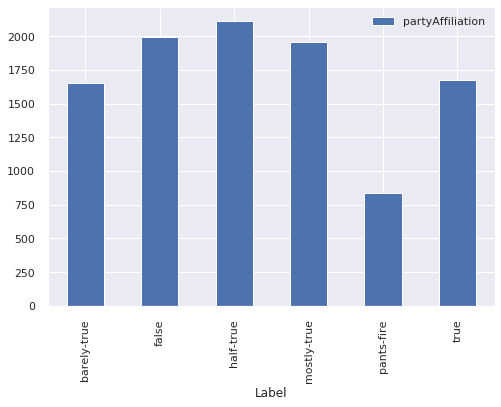

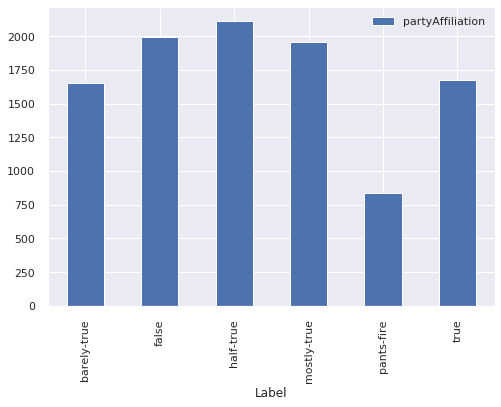

In [198]:
#dfTwoCols= train_news[['Label','Subject']]
dfTwoCols= train_news[['Label',titlecolname]]
dfTwoCols.groupby("Label").count().plot(kind='bar')

In [199]:
dfTwoCols['verdict'] = dfTwoCols['Label'].map({'false': 0, 'true': 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols

,Label,partyAffiliation,verdict
0,false,republican,0
1,half-true,democrat,1
2,mostly-true,democrat,1
3,false,none,0
4,half-true,democrat,1
...,...,...,...
10235,mostly-true,none,1
10236,mostly-true,republican,1
10237,half-true,republican,1
10238,false,democrat,0


,Label,partyAffiliation,verdict
0,false,republican,0
1,half-true,democrat,1
2,mostly-true,democrat,1
3,false,none,0
4,half-true,democrat,1
...,...,...,...
10235,mostly-true,none,1
10236,mostly-true,republican,1
10237,half-true,republican,1
10238,false,democrat,0


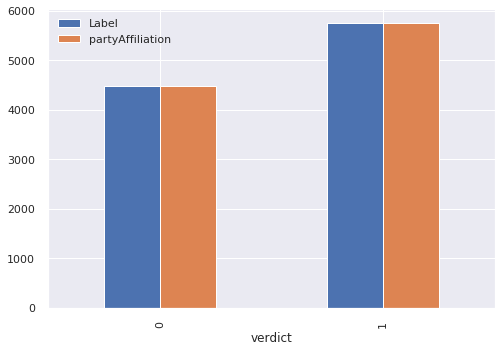

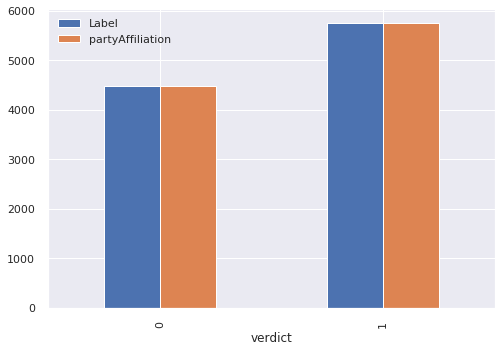

In [200]:
dfTwoCols.groupby("verdict").count().plot(kind='bar')

In [201]:
ct1=pd.crosstab(dfTwoCols[titlecolname],dfTwoCols["verdict"],margins=True)
ct1.sort_values('All', ascending=False)

verdict,0,1,All
partyAffiliation,,,
All,4486,5752,10238
republican,2240,2257,4497
democrat,1127,2209,3336
none,856,888,1744
organization,112,107,219
independent,40,107,147
newsmaker,19,37,56
libertarian,13,27,40
activist,14,25,39


verdict,0,1,All
partyAffiliation,,,
All,4486,5752,10238
republican,2240,2257,4497
democrat,1127,2209,3336
none,856,888,1744
organization,112,107,219
independent,40,107,147
newsmaker,19,37,56
libertarian,13,27,40
activist,14,25,39


Now that we have some information we can proceed find more information by processing the text to find unique values in subjects. Also by visualization we can observe that sensational news will have extremely polarised graphs. Applying data preprocessing for NLP processing like tokeninsing, stemming etc



In [202]:
#print(bow_corpus)
class_train=np.array(dfTwoCols["verdict"])
print(class_train)
class_train=class_train.reshape(-1,1)
print(class_train)

pipeline.fit(train_news['Statement'],class_train)

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess at 0x7fe9c7714840>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

[0 1 1 ... 1 0 0]
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess at 0x7fe9c3438510>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [203]:
#test
#dfs_test = pd.read_excel("input")
msg_test=test_news["Statement"]
dfTwoCols_test= test_news[['Label','Subject']]
dfTwoCols_test['verdict'] = dfTwoCols_test['Label'].map({'false': 0, 'true': 1, 'barely-true':0, 'half-true':1,'mostly-true':1,'pants-fire':0})
dfTwoCols_test
class_test=np.array(dfTwoCols_test["verdict"])
print(class_test)
class_test=class_test.reshape(-1,1)
print(class_test)
predictions = pipeline.predict(msg_test)

[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[1 0 0 ... 0 0 0]
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [204]:
print(classification_report(class_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       553
           1       0.61      0.86      0.72       714

    accuracy                           0.62      1267
   macro avg       0.62      0.58      0.56      1267
weighted avg       0.62      0.62      0.58      1267

              precision    recall  f1-score   support

           0       0.63      0.30      0.41       553
           1       0.61      0.86      0.72       714

    accuracy                           0.62      1267
   macro avg       0.62      0.58      0.56      1267
weighted avg       0.62      0.62      0.58      1267



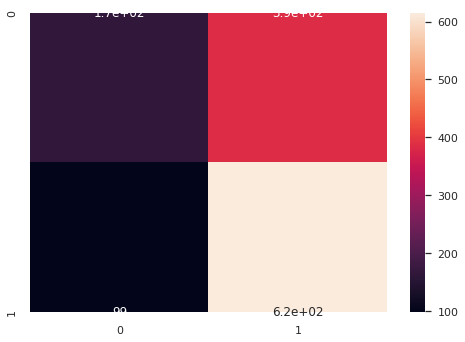

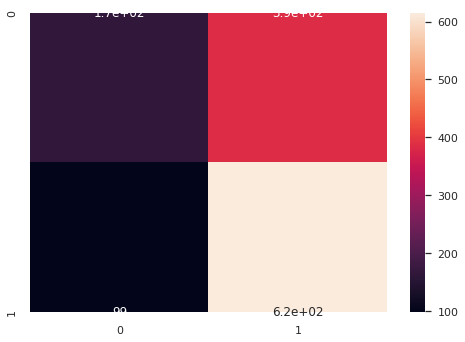

In [205]:
sns.heatmap(confusion_matrix(class_test,predictions),annot=True)
# references: https://www.kaggle.com/astandrik/simple-spam-filter-using-naive-bayes

## Classifiers

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer

#### CounterVectorizer & Stats

In [0]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

In [208]:
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])
    
get_tfidf_stats()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Tfidfvectorizer compute the word counts, idf and tf-idf values all at once

In [0]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

### Data Amalgamation
Input from  Party Tweets are amalgamated to create the model

In [211]:
dataset_body2 = pd.read_csv(train_party, sep=',')
dataset_body2.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


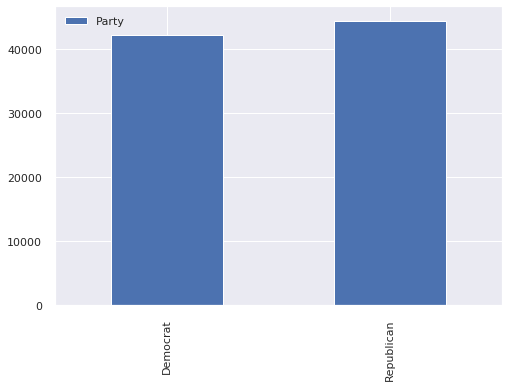

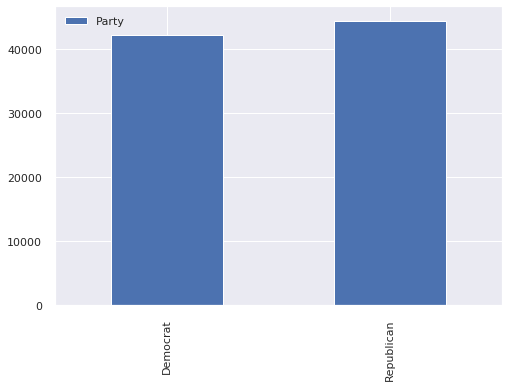

In [212]:
fig, ax = plt.subplots()
ax1 = dataset_body2['Party'].value_counts().sort_index(ascending=True).head(10264).plot(kind='bar', ax=ax, legend=True)


#### Create a doc2vec model for the training dataset

In [213]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(dataset_body2['Tweet'])]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Iterations for the Model
With the new datasource, we perform about 60 iterations to perfect the model.

In [214]:
max_epochs = 3
vec_size = 20
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

savedModel = "/content/gdrive/My Drive/Drifters/Models/PoliticalAffiliation.model"
model.save(savedModel)
print("Model Saved")

iteration 0
iteration 1
iteration 2
Model Saved
iteration 0
iteration 1
iteration 2
Model Saved


#### Model Validation
Once the iterations are complete, we now test the model by feeding a new statement into the model testing its accuracy

In [215]:
#testing for a text
from gensim.models.doc2vec import Doc2Vec
text = "obama supports third trimester abortion"
model= Doc2Vec.load(savedModel)
#to find the vector of a document which is not in training data
test_data = word_tokenize(text)
v1 = model.infer_vector(test_data)
similar_doc = model.docvecs.most_similar([v1])
print(similar_doc[0][0])
test_sentence= [model.infer_vector(word_tokenize(text))]
print (test_sentence)

29260
[array([-0.3369372 ,  0.316741  , -0.1519871 ,  0.39998674, -0.06741726,
        0.09898617, -0.11807661, -0.17505927,  0.10020901, -0.3785779 ,
        0.1967414 ,  0.03874473, -0.0540822 , -0.1320142 ,  0.2213871 ,
        0.17282008,  0.2892313 ,  0.25196892,  0.09872525, -0.09002648],
      dtype=float32)]
49029
[array([-0.30909577,  0.3596401 , -0.3583733 ,  0.3049577 , -0.08194809,
        0.2859843 ,  0.11058369, -0.03418792,  0.2576165 , -0.27357322,
        0.3018241 ,  0.08809373, -0.09991529, -0.23319833,  0.2164076 ,
       -0.02730088, -0.04137145,  0.0247582 , -0.0142068 ,  0.09786621],
      dtype=float32)]


In [216]:
sensationCol=[]
for row in train_news[titlecolname]:
    try:
        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        sensationCol.append(similar_doc[0][0])
    except:
        pass
sourceCol=list(map(int, sensationCol))
train_news['context_new']=pd.Series(sensationCol)
train_news.head()

,Json_Id,Label,Statement,Subject,SpeakerName,JobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement,values_for_true,context_new
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,0,say anni list polit group support trimest abor...,True,32753
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,1,declin coal start start natur take start begin...,False,82597
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1,2,hillari clinton agre john mccain vote georg bu...,False,36413
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,3,health care reform legisl like mandat free cha...,False,40165
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,4,econom turnaround start term,False,22716


,Json_Id,Label,Statement,Subject,SpeakerName,JobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement,values_for_true,context_new
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,0,say anni list polit group support trimest abor...,True,30770
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,1,declin coal start start natur take start begin...,False,56548
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1,2,hillari clinton agre john mccain vote georg bu...,False,53140
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0,3,health care reform legisl like mandat free cha...,False,43442
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1,4,econom turnaround start term,False,76962


In [217]:
sensationCol=[]
for row in test_news[titlecolname]:
    try:
        
        test_data = word_tokenize(row.lower())
        v1 = model.infer_vector(test_data)
        similar_doc = model.docvecs.most_similar([v1])
        sensationCol.append(similar_doc[0][0])
    except:
        pass
sourceCol=list(map(int, sensationCol))
test_news['context_new']=pd.Series(sensationCol)
test_news.head()

,Json_Id,Label,Statement,Subject,SpeakerName,JobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement,context_new
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,1,0,build wall mexico border liter year,56551
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,0,1,wisconsin pace doubl number layoff year,22940
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,0,2,say john mccain help vet,44731
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,1,3,suzann bonamici support plan choic medicar adv...,32721
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,4,ask report center crimin scheme violat campaig...,22868


,Json_Id,Label,Statement,Subject,SpeakerName,JobTitle,StateInfo,partyAffiliation,BarelyTrueCounts,FalseCounts,HalfTrueCounts,MostlyTrueCounts,PantsOnFireCounts,Context,Encoded_Label,index,processed_Statement,context_new
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,1,0,build wall mexico border liter year,41219
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,0,1,wisconsin pace doubl number layoff year,39008
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,0,2,say john mccain help vet,39050
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,1,3,suzann bonamici support plan choic medicar adv...,86291
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,0,4,ask report center crimin scheme violat campaig...,35653


## Results Comparision Table 

In [218]:
X_test=train_news[titlecolname]
Y_test = train_news[labelcolname]
X_test =  X_test.replace(np.nan,'NoParty', regex=True)
print(Y_train.head())

0    0
1    1
2    1
3    0
4    1
Name: Encoded_Label, dtype: int64
0    0
1    1
2    1
3    0
4    1
Name: Encoded_Label, dtype: int64


In [0]:
def code_pipeline(cv, counterV, clsf, clsf_object, x_train, y_train, x_test, y_test):
  pipe = Pipeline([(cv, counterV), (clsf, clsf_object)])
  pipe.fit(x_train, y_train)
  predict = pipe.predict(x_test)
  cls_report=classification_report(y_test,predict)
  cnfmtx=confusion_matrix(y_test,predict)
  mse=mean_squared_error(y_test, predict)
  mae=mean_absolute_error(y_test, predict)
  msse=np.sqrt(mean_squared_error(y_test, predict))
  return np.mean(predict == y_test), cls_report, cnfmtx, mse, mae, msse

In [220]:

data = code_pipeline('NB', countV, 'nbclf', MultinomialNB(), X_train, Y_train, X_test, Y_test)
print(data)

(0.56298828125, '              precision    recall  f1-score   support\n\n           0       0.53      0.03      0.06      4488\n           1       0.56      0.98      0.72      5752\n\n    accuracy                           0.56     10240\n   macro avg       0.54      0.50      0.39     10240\nweighted avg       0.55      0.56      0.43     10240\n', array([[ 132, 4356],
       [ 119, 5633]]), 0.43701171875, 0.43701171875, 0.6610686187908181)
(0.56298828125, '              precision    recall  f1-score   support\n\n           0       0.53      0.03      0.06      4488\n           1       0.56      0.98      0.72      5752\n\n    accuracy                           0.56     10240\n   macro avg       0.54      0.50      0.39     10240\nweighted avg       0.55      0.56      0.43     10240\n', array([[ 132, 4356],
       [ 119, 5633]]), 0.43701171875, 0.43701171875, 0.6610686187908181)


In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
#funcDict = {"DescionTree": DecisionTreeClassifier(),"Randon Forest": RandomForestClassifier(n_estimators=100)} #,"naive Bayes": GaussianNB(),"SVC": SVC()}
funcDict = {"MultiNB": MultinomialNB(), "DescionTree": DecisionTreeClassifier(),"Random Forest": RandomForestClassifier(n_estimators=100), "LogR_clf":LogisticRegression(), 
            "svm_Linear": svm.LinearSVC(), "SVM_SGD": SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3), "xgb_clf": XGBClassifier()}
p = PrettyTable(["Algorithim", "Accuracy","Confusion Matrix", "Mean Squared Error","Mean Absolute Error" ,"MSSE","Classification Report"])
p.padding_width = 1
p.float_format='.8'
for key in p.align.keys():
    p.align[key] = 'l'

for key,value1 in funcDict.items():
    data,cls_report,cfs1,mse,mae,msse = code_pipeline('PIPELINE', CountVectorizer(), 'nb_clf', value1, X_train, Y_train, X_test, Y_test)
    p.add_row([key,data,cfs1,mse,mae,msse,cls_report])
    #p.add_row(["---","---","---","---","---","---","---"])
    p.add_row(["--------------","-------------------","-------------------","----------------------","-----------------------","------------------","-------------------------------------------------------"])

print(p)

+----------------+---------------------+---------------------+------------------------+-------------------------+--------------------+---------------------------------------------------------+
| Algorithim     | Accuracy            | Confusion Matrix    | Mean Squared Error     | Mean Absolute Error     | MSSE               | Classification Report                                   |
+----------------+---------------------+---------------------+------------------------+-------------------------+--------------------+---------------------------------------------------------+
| MultiNB        | 0.56298828          | [[ 132 4356]        | 0.43701172             | 0.43701172              | 0.66106862         |               precision    recall  f1-score   support   |
|                |                     |  [ 119 5633]]       |                        |                         |                    |                                                         |
|                |                 

### Classification Algorithms


#### Building Classifier using Naives Bayes regression

In [222]:
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

train_news_label = train_news[labelcolname].dropna()
train_news_title = train_news[titlecolname].dropna()
test_news_label = test_news[labelcolname].dropna()
nb_pipeline.fit(train_news[titlecolname].dropna(), train_news_label[0:len(train_news_title)])
predicted_nb = nb_pipeline.predict(test_news[titlecolname].dropna())
np.mean(predicted_nb == test_news_label[0:len(predicted_nb)])

0.5659037095501184

0.5659037095501184

#### Building Classifier using Logistic regression

In [223]:
logR_pipeline = Pipeline([('LogRCV',countV),('LogR_clf',LogisticRegression())])

logR_pipeline.fit(train_news_title, train_news_label[0:len(train_news_title)])
predicted_LogR = logR_pipeline.predict(test_news[titlecolname].dropna())
np.mean(predicted_LogR == test_news_label[0:len(predicted_LogR)])

0.56353591160221

0.56353591160221

#### Building Classifier using Linear SVM Classifier

In [224]:
svm_pipeline = Pipeline([('svmCV',countV),('svm_clf',svm.LinearSVC())])

svm_pipeline.fit(train_news_title, train_news_label[0:len(train_news_title)])
predicted_svm = svm_pipeline.predict(test_news[titlecolname].dropna())
np.mean(predicted_svm == test_news_label[0:len(predicted_svm)])

0.56353591160221

0.56353591160221

#### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [225]:
#sgd_pipeline = Pipeline([('svm2CV',countV),('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))])
sgd_pipeline = Pipeline([('svm2CV',countV),('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))])

sgd_pipeline.fit(train_news_title, train_news_label[0:len(train_news_title)])
predicted_sgd = sgd_pipeline.predict(test_news[titlecolname].dropna())
np.mean(predicted_sgd == test_news_label[0:len(predicted_sgd)])

0.56353591160221

0.56353591160221

#### Building Classifier using RandomForestClassifier

In [226]:
#random forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news_title, train_news_label[0:len(train_news_title)])
predicted_rf = random_forest.predict(test_news[titlecolname].dropna())
np.mean(predicted_rf == test_news_label[0:len(predicted_rf)])

0.56353591160221

0.56353591160221

In [227]:
#Extreme Gradient Booster
from xgboost import XGBClassifier
xgboost_Pipeline = Pipeline([
        ('xgbCV',countV),
        ('xgb_clf',XGBClassifier())
        ])
    
xgboost_Pipeline.fit(train_news_title, train_news_label[0:len(train_news_title)])
predicted_xgb = xgboost_Pipeline.predict(test_news[titlecolname].dropna())
np.mean(predicted_xgb == test_news_label[0:len(predicted_xgb)])

0.56353591160221

0.56353591160221

In [0]:
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])
    val= []
    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind][titlecolname].dropna() 
        train_y = train_news.iloc[train_ind][labelcolname].dropna()
    
        test_text = train_news.iloc[test_ind][titlecolname].dropna()
        test_y = train_news.iloc[test_ind][labelcolname].dropna()
        
        classifier.fit(train_text,train_y[0:len(train_text)])
        predictions = classifier.predict(test_text)
        confusion += confusion_matrix(test_y[0:len(predictions)],predictions)
        score = f1_score(test_y[0:len(predictions)],predictions)
        scores.append(score)
    
    print('Total statements classified:{}'.format(len(train_news)))
    print('Score:{}'.format(sum(scores)/len(scores)))
    print('Score length:{}'.format(len(scores)))
    cm = confusion
    #sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    sns.heatmap(cm, annot=True, cmap="Oranges" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Total statements classified:10240
Score:0.716092696749237
Score length:5


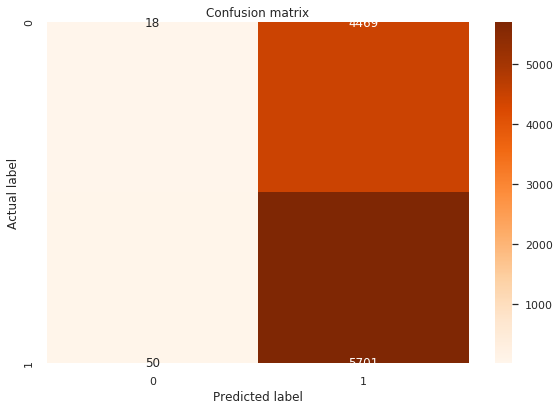

Total statements classified:10240
Score:0.716092696749237
Score length:5


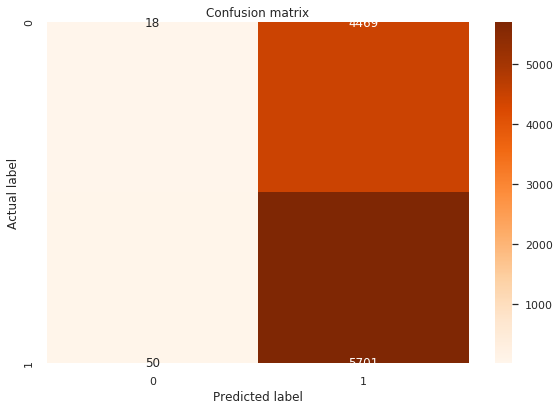

In [229]:
build_confusion_matrix(nb_pipeline)

Total statements classified:10240
Score:0.7164307337971738
Score length:5


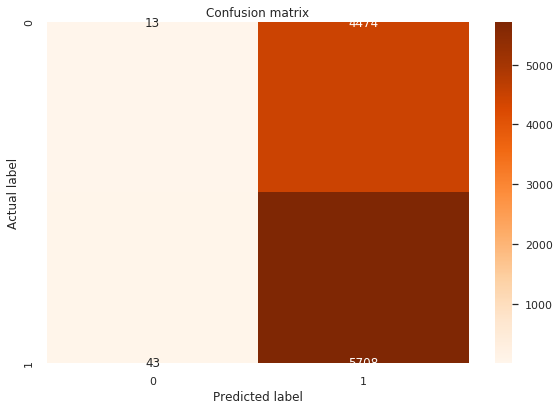

Total statements classified:10240
Score:0.7164307337971738
Score length:5


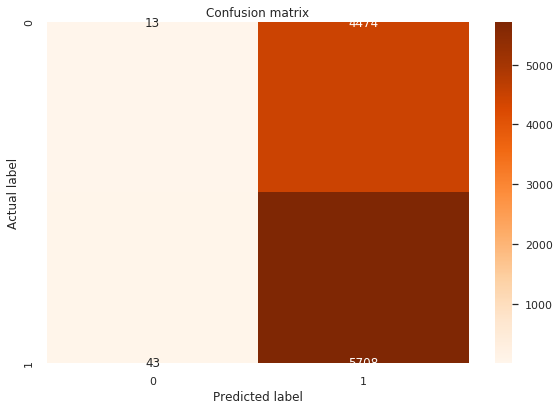

In [230]:
build_confusion_matrix(logR_pipeline)

Total statements classified:10240
Score:0.7163486198326752
Score length:5


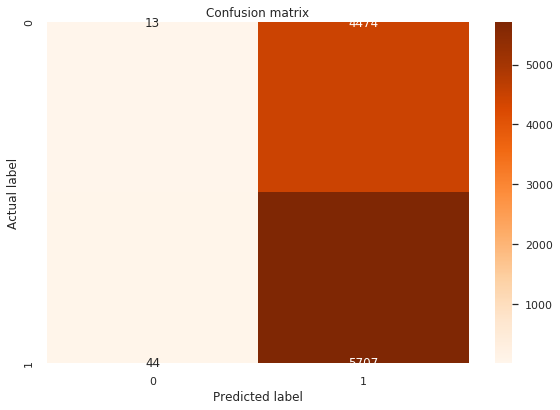

Total statements classified:10240
Score:0.7163486198326752
Score length:5


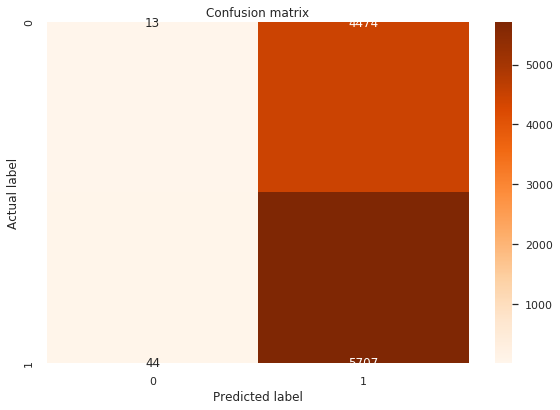

In [231]:
build_confusion_matrix(svm_pipeline)

Total statements classified:10240
Score:0.7188100855371808
Score length:5


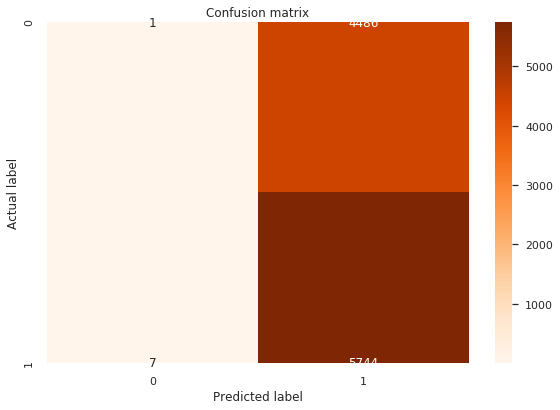

Total statements classified:10240
Score:0.7188100855371808
Score length:5


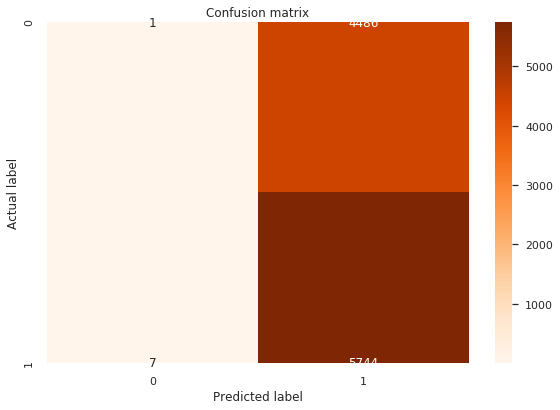

In [232]:
build_confusion_matrix(sgd_pipeline)

Total statements classified:10240
Score:0.7159492818961422
Score length:5


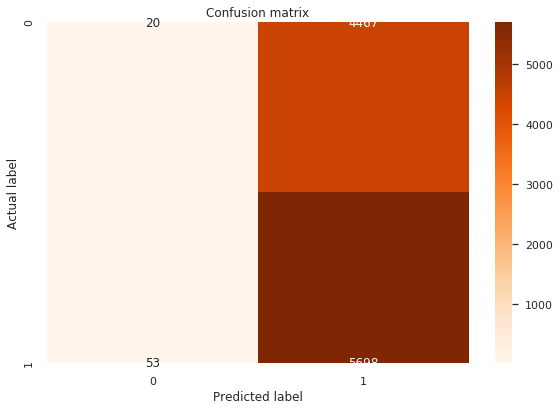

Total statements classified:10240
Score:0.7159492818961422
Score length:5


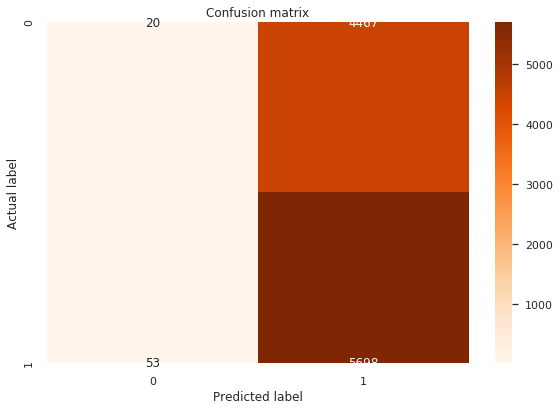

In [233]:
build_confusion_matrix(random_forest)

Total statements classified:10240
Score:0.716511514466612
Score length:5


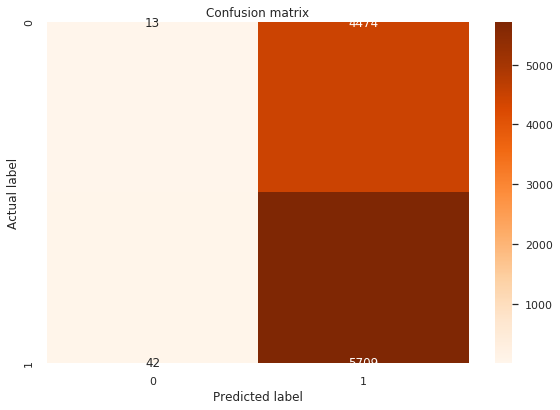

Total statements classified:10240
Score:0.716511514466612
Score length:5


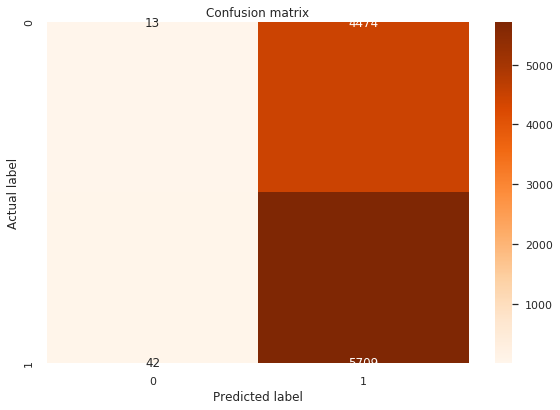

In [234]:
build_confusion_matrix(xgboost_Pipeline)